#### Section 3.2 Evaluation of QSAR tools and structural alerts

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn import metrics 
from matplotlib.ticker import PercentFormatter

In [3]:
raw_dat_dir = '/home/grace/Documents/python/genetox/data/raw/'
processed_dat_dir = '/home/grace/Documents/python/genetox/data/processed/'
interim_dat_dir = '/home/grace/Documents/python/genetox/data/interim/'
figures_dir = '/home/grace/Documents/python/genetox/reports/figures/'

In [4]:
from sklearn.metrics import confusion_matrix
from itertools import combinations
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

In [5]:
import sys

sys.path.append('/home/grace/Documents/python/genetox/models/')

from mlfunctions import *

Found an error in the original functions that resulted in Sensitivity and Specificity calculations being wrong. Corrected for the re-submission

In [6]:
df_demarini = pd.read_csv(processed_dat_dir+'DeMarini_calls_120221.csv',index_col = 'dtxsid')

In [7]:
df_demarini

,DeMarini_call,DeMarini_outcome
dtxsid,,
DTXSID00100498,not clastogen,0.0
DTXSID00100670,non gentox,0.0
DTXSID00100756,non gentox,0.0
DTXSID00101041,gentox,1.0
DTXSID00101061,clastogen,1.0
...,...,...
DTXSID9097381,non gentox,0.0
DTXSID9098147,non gentox,0.0
DTXSID9098220,non gentox,0.0


#### Read in predictions and alerts

#### Evaluation of categorisation outcomes relative to TEST Consensus Ames model predictions

In [8]:
TEST_preds_df= pd.read_csv(processed_dat_dir+'TEST_consensus_Ames_predictions_100221.csv')

In [9]:
TEST_preds_df.head()

,Unnamed: 0,DTXSID_of_genetox_chemical,DTXSID_of_chemical_structure_predicted,Error,Exp_Value,Pred_Value,Exp_Result,Pred_Result,TEST_prediction,ID,Query,SmilesRan,QSAR_READY_SMILES (RDKit Mol),QSAR_READY_SMILES (RDKit Mol) (Kekulized)
0,0,DTXSID00148597,DTXSID00148597,NaN,1.0,0.79,Mutagenicity Positive,Mutagenicity Positive,1.0,1086-00-6,1086-00-6,ClCC1=CC=C2C=CC3=CC=CC=4C=CC1=C2C34,ClCC1=CC=C2C=CC3=CC=CC=4C=CC1=C2C34,ClCC1=CC=C2C=CC3=CC=CC4=CC=C1C2=C34
1,1,DTXSID00157169,DTXSID00157169,NaN,NaN,0.53,NaN,Mutagenicity Positive,1.0,131657-78-8,131657-78-8,O=[N+]([O-])C1=CC(Cl)=C(O)C(=C1)NCC,O=[N+]([O-])C1=CC(Cl)=C(O)C(=C1)NCC,CCNC1=CC([N+](=O)[O-])=CC(Cl)=C1O
2,2,DTXSID00158116,DTXSID00158116,NaN,1.0,1.03,Mutagenicity Positive,Mutagenicity Positive,1.0,13345-26-1,13345-26-1,OC=1C=CC2=C(C1)C=C3C=CC4=CC=CC=5C=CC2=C3C45,OC=1C=CC2=C(C1)C=C3C=CC4=CC=CC=5C=CC2=C3C45,OC1=CC=C2C(=C1)C=C1C=CC3=CC=CC4=CC=C2C1=C34
3,3,DTXSID00159204,DTXSID00159204,NaN,NaN,0.08,NaN,Mutagenicity Negative,0.0,13501-76-3,13501-76-3,ClCCC[Si](OCC)(OCC)C,ClCCC[Si](OCC)(OCC)C,CCO[Si](C)(CCCCl)OCC
4,4,DTXSID00160734,DTXSID5022568,NaN,NaN,0.38,NaN,Mutagenicity Negative,0.0,66376-36-1,66376-36-1,O=P(O)(O)C(O)(CCCN)P(=O)(O)O,O=P(O)(O)C(O)(CCCN)P(=O)(O)O,NCCCC(O)(P(=O)(O)O)P(=O)(O)O


In [10]:
df_test = TEST_preds_df.copy()

In [11]:
df_test = df_test[['DTXSID_of_genetox_chemical',
       'TEST_prediction']]

In [12]:
df_test.columns = ['DTXSID', 'TEST']

In [13]:
df_test.index = df_test['DTXSID']

In [14]:
metrics_tools=pd.DataFrame()

# Calculate Prediction Metrics - compare against DeMarini calls
compare = pd.concat([df_demarini['DeMarini_outcome'], df_test['TEST']], axis = 1, sort = True).dropna()
cnf_matrix = confusion_matrix(compare['DeMarini_outcome'], compare['TEST'])
total, acc, sens, spec, ba, kappa, ppv, npv = calcMetrics(cnf_matrix)
metrics_tools.loc['EPA TEST|Williamsetal', 'Truth'] = 'Categorization_Scheme'
metrics_tools.loc['EPA TEST|Williamsetal', 'Total'] = total 
metrics_tools.loc['EPA TEST|Williamsetal', 'Accuracy'] = acc 
metrics_tools.loc['EPA TEST|Williamsetal', 'Sensitivity'] = sens 
metrics_tools.loc['EPA TEST|Williamsetal', 'Specificity'] = spec 
metrics_tools.loc['EPA TEST|Williamsetal', 'Balanced Accuracy'] = ba 
metrics_tools.loc['EPA TEST|Williamsetal', 'Kappa'] = kappa
metrics_tools.loc['EPA TEST|Williamsetal', 'PPV'] = ppv
metrics_tools.loc['EPA TEST|Williamsetal', 'NPV'] = npv
# Rename Column ##
df_test.rename(columns={'TEST':'T1'}, inplace = True)

In [15]:
metrics_tools

,Truth,Total,Accuracy,Sensitivity,Specificity,Balanced Accuracy,Kappa,PPV,NPV
EPA TEST|Williamsetal,Categorization_Scheme,6445.0,74.07,48.55,87.66,68.1,0.39,67.68,76.19


Verifying that the equations in the function are correct

In [16]:
confusion_matrix(compare['DeMarini_outcome'], compare['TEST']).ravel()

array([3687,  519, 1152, 1087])

In [17]:
pd.crosstab(compare['DeMarini_outcome'], compare['TEST'])

TEST,0.0,1.0
DeMarini_outcome,,
0.0,3687,519
1.0,1152,1087


In [18]:
from sklearn.metrics import cohen_kappa_score

In [19]:
cohen_kappa_score(compare['DeMarini_outcome'], compare['TEST'])

0.3877209382924003

In [21]:
print(classification_report(compare['DeMarini_outcome'], compare['TEST']))

              precision    recall  f1-score   support

         0.0       0.76      0.88      0.82      4206
         1.0       0.68      0.49      0.57      2239

    accuracy                           0.74      6445
   macro avg       0.72      0.68      0.69      6445
weighted avg       0.73      0.74      0.73      6445



Moving onwards with the VEGA predictions

In [22]:
VEGA_pred_numeric = pd.read_csv(processed_dat_dir+'VEGA_pred_numeric_100221.csv')

In [24]:
VEGA_pred_numeric.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [25]:
df_vega = VEGA_pred_numeric.copy()

In [27]:
df_vega.index = df_vega['dtxsid']

In [30]:
df_vega.rename(columns = {'Mutagenicity (Ames test) CONSENSUS model - prediction' : 'T2',\
       'Mutagenicity (Ames test) model (CAESAR) - prediction': 'T3',\
       'Mutagenicity (Ames test) model (SarPy/IRFMN) - prediction' : 'T4', \
       'Mutagenicity (Ames test) model (ISS) - prediction': 'T5', \
       'Mutagenicity (Ames test) model (KNN/Read-Across) - prediction' : 'T6', \
       'Chromosomal aberration model (CORAL) - prediction' : 'T7', \
       'In vitro Micronucleus activity (IRFMN/VERMEER) - prediction' : 'T8', \
       'In vivo Micronucleus activity (IRFMN) - prediction': 'T9'}, inplace = True)

In [31]:
df_vega

,dtxsid,T2,T3,T4,T5,T6,T7,T8,T9
dtxsid,,,,,,,,,
DTXSID00148597,DTXSID00148597,1,1.0,1,1,1.0,0,NaN,1.0
DTXSID00157169,DTXSID00157169,1,1.0,1,1,1.0,1,1.0,0.0
DTXSID00158116,DTXSID00158116,1,1.0,1,1,1.0,0,1.0,0.0
DTXSID00159204,DTXSID00159204,1,1.0,1,1,0.0,0,NaN,0.0
DTXSID00160734,DTXSID00160734,0,0.0,0,0,1.0,1,1.0,1.0
...,...,...,...,...,...,...,...,...,...
DTXSID90890477,DTXSID90890477,1,1.0,1,1,1.0,0,0.0,0.0
DTXSID90890619,DTXSID90890619,1,1.0,0,1,1.0,1,0.0,NaN
DTXSID90890811,DTXSID90890811,0,0.0,0,0,0.0,0,0.0,0.0


In [32]:
compare = pd.concat([df_demarini['DeMarini_outcome'], df_vega], axis = 1, sort = True).dropna()
cnf_matrix = confusion_matrix(compare['DeMarini_outcome'], compare['T2'])
total, acc, sens, spec, ba, kappa, ppv, npv = calcMetrics(cnf_matrix)
metrics_tools.loc['VEGA T2|Williamsetal', 'Truth'] = 'Categorisation_Scheme'
metrics_tools.loc['VEGA T2|Williamsetal', 'Total'] = total 
metrics_tools.loc['VEGA T2|Williamsetal', 'Accuracy'] = acc 
metrics_tools.loc['VEGA T2|Williamsetal', 'Sensitivity'] = sens 
metrics_tools.loc['VEGA T2|Williamsetal', 'Specificity'] = spec 
metrics_tools.loc['VEGA T2|Williamsetal', 'Balanced Accuracy'] = ba 
metrics_tools.loc['VEGA T2|Williamsetal', 'Kappa'] = kappa
metrics_tools.loc['VEGA T2|Williamsetal', 'PPV'] = ppv
metrics_tools.loc['VEGA T2|Williamsetal', 'NPV'] = npv


cnf_matrix = confusion_matrix(compare['DeMarini_outcome'], compare['T3'])
total, acc, sens, spec, ba, kappa, ppv, npv = calcMetrics(cnf_matrix)
metrics_tools.loc['VEGA T3|Williamsetal', 'Truth'] = 'Categorisation_Scheme'
metrics_tools.loc['VEGA T3|Williamsetal', 'Total'] = total 
metrics_tools.loc['VEGA T3|Williamsetal', 'Accuracy'] = acc 
metrics_tools.loc['VEGA T3|Williamsetal', 'Sensitivity'] = sens 
metrics_tools.loc['VEGA T3|Williamsetal', 'Specificity'] = spec 
metrics_tools.loc['VEGA T3|Williamsetal', 'Balanced Accuracy'] = ba 
metrics_tools.loc['VEGA T3|Williamsetal', 'Kappa'] = kappa
metrics_tools.loc['VEGA T3|Williamsetal', 'PPV'] = ppv
metrics_tools.loc['VEGA T3|Williamsetal', 'NPV'] = npv

cnf_matrix = confusion_matrix(compare['DeMarini_outcome'], compare['T4'])
total, acc, sens, spec, ba, kappa, ppv, npv = calcMetrics(cnf_matrix)
metrics_tools.loc['VEGA T4|Williamsetal', 'Truth'] = 'Categorisation_Scheme'
metrics_tools.loc['VEGA T4|Williamsetal', 'Total'] = total 
metrics_tools.loc['VEGA T4|Williamsetal', 'Accuracy'] = acc 
metrics_tools.loc['VEGA T4|Williamsetal', 'Sensitivity'] = sens 
metrics_tools.loc['VEGA T4|Williamsetal', 'Specificity'] = spec 
metrics_tools.loc['VEGA T4|Williamsetal', 'Balanced Accuracy'] = ba 
metrics_tools.loc['VEGA T4|Williamsetal', 'Kappa'] = kappa
metrics_tools.loc['VEGA T4|Williamsetal', 'PPV'] = ppv
metrics_tools.loc['VEGA T4|Williamsetal', 'NPV'] = npv

cnf_matrix = confusion_matrix(compare['DeMarini_outcome'], compare['T5'])
total, acc, sens, spec, ba, kappa, ppv, npv = calcMetrics(cnf_matrix)
metrics_tools.loc['VEGA T5|Williamsetal', 'Truth'] = 'Categorisation_Scheme'
metrics_tools.loc['VEGA T5|Williamsetal', 'Total'] = total 
metrics_tools.loc['VEGA T5|Williamsetal', 'Accuracy'] = acc 
metrics_tools.loc['VEGA T5|Williamsetal', 'Sensitivity'] = sens 
metrics_tools.loc['VEGA T5|Williamsetal', 'Specificity'] = spec 
metrics_tools.loc['VEGA T5|Williamsetal', 'Balanced Accuracy'] = ba 
metrics_tools.loc['VEGA T5|Williamsetal', 'Kappa'] = kappa
metrics_tools.loc['VEGA T5|Williamsetal', 'PPV'] = ppv
metrics_tools.loc['VEGA T5|Williamsetal', 'NPV'] = npv

cnf_matrix = confusion_matrix(compare['DeMarini_outcome'], compare['T6'])
total, acc, sens, spec, ba, kappa, ppv, npv = calcMetrics(cnf_matrix)
metrics_tools.loc['VEGA T6|Williamsetal', 'Truth'] = 'Categorisation_Scheme'
metrics_tools.loc['VEGA T6|Williamsetal', 'Total'] = total 
metrics_tools.loc['VEGA T6|Williamsetal', 'Accuracy'] = acc 
metrics_tools.loc['VEGA T6|Williamsetal', 'Sensitivity'] = sens 
metrics_tools.loc['VEGA T6|Williamsetal', 'Specificity'] = spec 
metrics_tools.loc['VEGA T6|Williamsetal', 'Balanced Accuracy'] = ba 
metrics_tools.loc['VEGA T6|Williamsetal', 'Kappa'] = kappa
metrics_tools.loc['VEGA T6|Williamsetal', 'PPV'] = ppv
metrics_tools.loc['VEGA T6|Williamsetal', 'NPV'] = npv

cnf_matrix = confusion_matrix(compare['DeMarini_outcome'], compare['T7'])
total, acc, sens, spec, ba, kappa, ppv, npv = calcMetrics(cnf_matrix)
metrics_tools.loc['VEGA T7|Williamsetal', 'Truth'] = 'Categorisation_Scheme'
metrics_tools.loc['VEGA T7|Williamsetal', 'Total'] = total 
metrics_tools.loc['VEGA T7|Williamsetal', 'Accuracy'] = acc 
metrics_tools.loc['VEGA T7|Williamsetal', 'Sensitivity'] = sens 
metrics_tools.loc['VEGA T7|Williamsetal', 'Specificity'] = spec 
metrics_tools.loc['VEGA T7|Williamsetal', 'Balanced Accuracy'] = ba 
metrics_tools.loc['VEGA T7|Williamsetal', 'Kappa'] = kappa
metrics_tools.loc['VEGA T7|Williamsetal', 'PPV'] = ppv
metrics_tools.loc['VEGA T7|Williamsetal', 'NPV'] = npv


cnf_matrix = confusion_matrix(compare['DeMarini_outcome'], compare['T8'])
total, acc, sens, spec, ba, kappa, ppv, npv = calcMetrics(cnf_matrix)
metrics_tools.loc['VEGA T8|Williamsetal', 'Truth'] = 'Categorisation_Scheme'
metrics_tools.loc['VEGA T8|Williamsetal', 'Total'] = total 
metrics_tools.loc['VEGA T8|Williamsetal', 'Accuracy'] = acc 
metrics_tools.loc['VEGA T8|Williamsetal', 'Sensitivity'] = sens 
metrics_tools.loc['VEGA T8|Williamsetal', 'Specificity'] = spec 
metrics_tools.loc['VEGA T8|Williamsetal', 'Balanced Accuracy'] = ba 
metrics_tools.loc['VEGA T8|Williamsetal', 'Kappa'] = kappa
metrics_tools.loc['VEGA T8|Williamsetal', 'PPV'] = ppv
metrics_tools.loc['VEGA T8|Williamsetal', 'NPV'] = npv


cnf_matrix = confusion_matrix(compare['DeMarini_outcome'], compare['T9'])
total, acc, sens, spec, ba, kappa, ppv, npv = calcMetrics(cnf_matrix)
metrics_tools.loc['VEGA T9|Williamsetal', 'Truth'] = 'Categorisation_Scheme'
metrics_tools.loc['VEGA T9|Williamsetal', 'Total'] = total 
metrics_tools.loc['VEGA T9|Williamsetal', 'Accuracy'] = acc 
metrics_tools.loc['VEGA T9|Williamsetal', 'Sensitivity'] = sens 
metrics_tools.loc['VEGA T9|Williamsetal', 'Specificity'] = spec 
metrics_tools.loc['VEGA T9|Williamsetal', 'Balanced Accuracy'] = ba 
metrics_tools.loc['VEGA T9|Williamsetal', 'Kappa'] = kappa
metrics_tools.loc['VEGA T9|Williamsetal', 'PPV'] = ppv
metrics_tools.loc['VEGA T9|Williamsetal', 'NPV'] = npv



In [34]:
OECD_TB_numeric = pd.read_csv(processed_dat_dir+'OECD_TB_numeric_100221.csv')

In [36]:
OECD_TB_numeric.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [41]:
OECD_TB_numeric = OECD_TB_numeric[['DTXSID','DNA_Ames_OASIS', 'DNA_binding_OASIS',
       'DNA_binding_OECD', 'Oncologic', 'Protein_binding_CA_OASIS', 'Ames_ISS',
       'MNT_ISS']]

In [43]:
df_oecd = OECD_TB_numeric.copy()

In [44]:
df_oecd.index = df_oecd['DTXSID']

In [47]:
df_oecd.columns = ['DTXSID', 'DNA_Ames_CA_MNT_OASIS', 'DNA_binding_OASIS', 'DNA_binding_OECD',
       'Oncologic', 'Protein_binding_CA_OASIS', 'Ames_ISS', 'MNT_ISS']

In [49]:
df_oecd.drop(['Oncologic'], axis = 1, inplace = True)

In [52]:
df_oecd.columns

Index(['DTXSID', 'DNA_Ames_CA_MNT_OASIS', 'DNA_binding_OASIS',
       'DNA_binding_OECD', 'Protein_binding_CA_OASIS', 'Ames_ISS', 'MNT_ISS'],
      dtype='object')

In [53]:
df_oecd.rename(columns={'DNA_Ames_CA_MNT_OASIS':'A1',\
                     'DNA_binding_OASIS':'A2',\
                       'DNA_binding_OECD' : 'A3',\
                     'Protein_binding_CA_OASIS':'A4',\
                     'Ames_ISS': 'A5',\
                     'MNT_ISS': 'A6',}, inplace = True)


In [54]:
# Calculate Prediction Metrics - compare with DeMarini calls
compare = pd.concat([df_demarini['DeMarini_outcome'], df_oecd], axis = 1, sort = True).dropna()
cnf_matrix = confusion_matrix(compare['DeMarini_outcome'], compare['A1'])
total, acc, sens, spec, ba, kappa, ppv, npv = calcMetrics(cnf_matrix)
metrics_tools.loc['OECD A1|Williamsetal', 'Truth'] = 'Categorisation_Scheme'
metrics_tools.loc['OECD A1|Williamsetal', 'Total'] = total 
metrics_tools.loc['OECD A1|Williamsetal', 'Accuracy'] = acc 
metrics_tools.loc['OECD A1|Williamsetal', 'Sensitivity'] = sens 
metrics_tools.loc['OECD A1|Williamsetal', 'Specificity'] = spec 
metrics_tools.loc['OECD A1|Williamsetal', 'Balanced Accuracy'] = ba 
metrics_tools.loc['OECD A1|Williamsetal', 'Kappa'] = kappa
metrics_tools.loc['OECD A1|Williamsetal', 'PPV'] = ppv
metrics_tools.loc['OECD A1|Williamsetal', 'NPV'] = npv

cnf_matrix = confusion_matrix(compare['DeMarini_outcome'], compare['A2'])
total, acc, sens, spec, ba, kappa, ppv, npv = calcMetrics(cnf_matrix)
metrics_tools.loc['OECD A2|Williamsetal', 'Truth'] = 'Categorisation_Scheme'
metrics_tools.loc['OECD A2|Williamsetal', 'Total'] = total 
metrics_tools.loc['OECD A2|Williamsetal', 'Accuracy'] = acc 
metrics_tools.loc['OECD A2|Williamsetal', 'Sensitivity'] = sens 
metrics_tools.loc['OECD A2|Williamsetal', 'Specificity'] = spec 
metrics_tools.loc['OECD A2|Williamsetal', 'Balanced Accuracy'] = ba 
metrics_tools.loc['OECD A2|Williamsetal', 'Kappa'] = kappa
metrics_tools.loc['OECD A2|Williamsetal', 'PPV'] = ppv
metrics_tools.loc['OECD A2|Williamsetal', 'NPV'] = npv

cnf_matrix = confusion_matrix(compare['DeMarini_outcome'], compare['A3'])
total, acc, sens, spec, ba, kappa, ppv, npv = calcMetrics(cnf_matrix)
metrics_tools.loc['OECD A3|Williamsetal', 'Truth'] = 'Categorisation_Scheme'
metrics_tools.loc['OECD A3|Williamsetal', 'Total'] = total 
metrics_tools.loc['OECD A3|Williamsetal', 'Accuracy'] = acc 
metrics_tools.loc['OECD A3|Williamsetal', 'Sensitivity'] = sens 
metrics_tools.loc['OECD A3|Williamsetal', 'Specificity'] = spec 
metrics_tools.loc['OECD A3|Williamsetal', 'Balanced Accuracy'] = ba 
metrics_tools.loc['OECD A3|Williamsetal', 'Kappa'] = kappa
metrics_tools.loc['OECD A3|Williamsetal', 'PPV'] = ppv
metrics_tools.loc['OECD A3|Williamsetal', 'NPV'] = npv

cnf_matrix = confusion_matrix(compare['DeMarini_outcome'], compare['A4'])
total, acc, sens, spec, ba, kappa, ppv, npv = calcMetrics(cnf_matrix)
metrics_tools.loc['OECD A4|Williamsetal', 'Truth'] = 'Categorisation_Scheme'
metrics_tools.loc['OECD A4|Williamsetal', 'Total'] = total 
metrics_tools.loc['OECD A4|Williamsetal', 'Accuracy'] = acc 
metrics_tools.loc['OECD A4|Williamsetal', 'Sensitivity'] = sens 
metrics_tools.loc['OECD A4|Williamsetal', 'Specificity'] = spec 
metrics_tools.loc['OECD A4|Williamsetal', 'Balanced Accuracy'] = ba 
metrics_tools.loc['OECD A4|Williamsetal', 'Kappa'] = kappa
metrics_tools.loc['OECD A4|Williamsetal', 'PPV'] = ppv
metrics_tools.loc['OECD A4|Williamsetal', 'NPV'] = npv

cnf_matrix = confusion_matrix(compare['DeMarini_outcome'], compare['A5'])
total, acc, sens, spec, ba, kappa, ppv, npv = calcMetrics(cnf_matrix)
metrics_tools.loc['OECD A5|Williamsetal', 'Truth'] = 'Categorisation_Scheme'
metrics_tools.loc['OECD A5|Williamsetal', 'Total'] = total 
metrics_tools.loc['OECD A5|Williamsetal', 'Accuracy'] = acc 
metrics_tools.loc['OECD A5|Williamsetal', 'Sensitivity'] = sens 
metrics_tools.loc['OECD A5|Williamsetal', 'Specificity'] = spec 
metrics_tools.loc['OECD A5|Williamsetal', 'Balanced Accuracy'] = ba 
metrics_tools.loc['OECD A5|Williamsetal', 'Kappa'] = kappa
metrics_tools.loc['OECD A5|Williamsetal', 'PPV'] = ppv
metrics_tools.loc['OECD A5|Williamsetal', 'NPV'] = npv


cnf_matrix = confusion_matrix(compare['DeMarini_outcome'], compare['A6'])
total, acc, sens, spec, ba, kappa, ppv, npv = calcMetrics(cnf_matrix)
metrics_tools.loc['OECD A6|Williamsetal', 'Truth'] = 'Categorisation_Scheme'
metrics_tools.loc['OECD A6|Williamsetal', 'Total'] = total 
metrics_tools.loc['OECD A6|Williamsetal', 'Accuracy'] = acc 
metrics_tools.loc['OECD A6|Williamsetal', 'Sensitivity'] = sens 
metrics_tools.loc['OECD A6|Williamsetal', 'Specificity'] = spec 
metrics_tools.loc['OECD A6|Williamsetal', 'Balanced Accuracy'] = ba 
metrics_tools.loc['OECD A6|Williamsetal', 'Kappa'] = kappa
metrics_tools.loc['OECD A6|Williamsetal', 'PPV'] = ppv
metrics_tools.loc['OECD A6|Williamsetal', 'NPV'] = npv


In [55]:
metrics_tools

,Truth,Total,Accuracy,Sensitivity,Specificity,Balanced Accuracy,Kappa,PPV,NPV
EPA TEST|Williamsetal,Categorization_Scheme,6445.0,74.07,48.55,87.66,68.10,0.39,67.68,76.19
VEGA T2|Williamsetal,Categorisation_Scheme,4724.0,76.44,63.34,82.98,73.16,0.47,65.04,81.92
VEGA T3|Williamsetal,Categorisation_Scheme,4724.0,72.31,63.66,76.63,70.14,0.39,57.65,80.84
VEGA T4|Williamsetal,Categorisation_Scheme,4724.0,71.87,58.07,78.76,68.42,0.37,57.74,78.99
VEGA T5|Williamsetal,Categorisation_Scheme,4724.0,73.60,61.75,79.52,70.63,0.41,60.11,80.62
VEGA T6|Williamsetal,Categorisation_Scheme,4724.0,75.61,61.25,82.79,72.02,0.45,64.01,81.04
VEGA T7|Williamsetal,Categorisation_Scheme,4724.0,68.88,44.66,80.98,62.82,0.27,53.99,74.55
VEGA T8|Williamsetal,Categorisation_Scheme,4724.0,60.65,79.86,51.05,65.45,0.26,44.91,83.53
VEGA T9|Williamsetal,Categorisation_Scheme,4724.0,69.58,27.57,90.57,59.07,0.21,59.37,71.45
OECD A1|Williamsetal,Categorisation_Scheme,6179.0,75.68,36.38,96.23,66.31,0.38,83.46,74.31


In [56]:
metrics_tools.to_csv(processed_dat_dir+'metrics_tools_120221.csv')

In [57]:
metrics_tools.describe()

,Total,Accuracy,Sensitivity,Specificity,Balanced Accuracy,Kappa,PPV,NPV
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,5420.733333,70.122000,54.784667,77.990000,66.386667,0.331333,58.662000,77.686667
std,773.786189,5.542805,16.052716,13.583781,4.686788,0.095159,9.722376,4.009978
min,4724.000000,57.550000,24.320000,47.150000,56.980000,0.160000,43.390000,69.370000
25%,4724.000000,68.045000,46.605000,77.410000,63.205000,0.260000,54.560000,75.370000
50%,4724.000000,71.870000,60.040000,80.550000,67.330000,0.370000,59.270000,78.990000
75%,6179.000000,73.835000,62.545000,85.320000,69.815000,0.390000,62.060000,80.730000
max,6445.000000,76.440000,79.860000,96.230000,73.160000,0.470000,83.460000,83.530000


Sanity checks for the metrics computed

In [61]:
sanity_check = compare.head()

In [62]:
sanity_check

,DeMarini_outcome,DTXSID,A1,A2,A3,A4,A5,A6
DTXSID00148597,1.0,DTXSID00148597,0.0,1.0,1.0,1.0,1.0,1.0
DTXSID00157169,1.0,DTXSID00157169,1.0,1.0,1.0,0.0,1.0,1.0
DTXSID00159204,0.0,DTXSID00159204,0.0,0.0,1.0,0.0,1.0,1.0
DTXSID00160734,0.0,DTXSID00160734,0.0,0.0,0.0,0.0,0.0,1.0
DTXSID00162834,0.0,DTXSID00162834,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
pd.crosstab(sanity_check.DeMarini_outcome, sanity_check.A6)

A6,0.0,1.0
DeMarini_outcome,,
0.0,1,2
1.0,0,2


In [65]:
print(classification_report(sanity_check.DeMarini_outcome, sanity_check.A6))

              precision    recall  f1-score   support

         0.0       1.00      0.33      0.50         3
         1.0       0.50      1.00      0.67         2

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5



#### Figure 4 Combine all the tools in a single dataframe and check the correlation to identify any models that should be dropped for the ensemble model development

In [70]:
x = pd.concat([df_test['T1'], df_vega, df_oecd], axis = 1, sort=True)

In [72]:
x.drop(['dtxsid', 'DTXSID'], axis = 1, inplace = True)

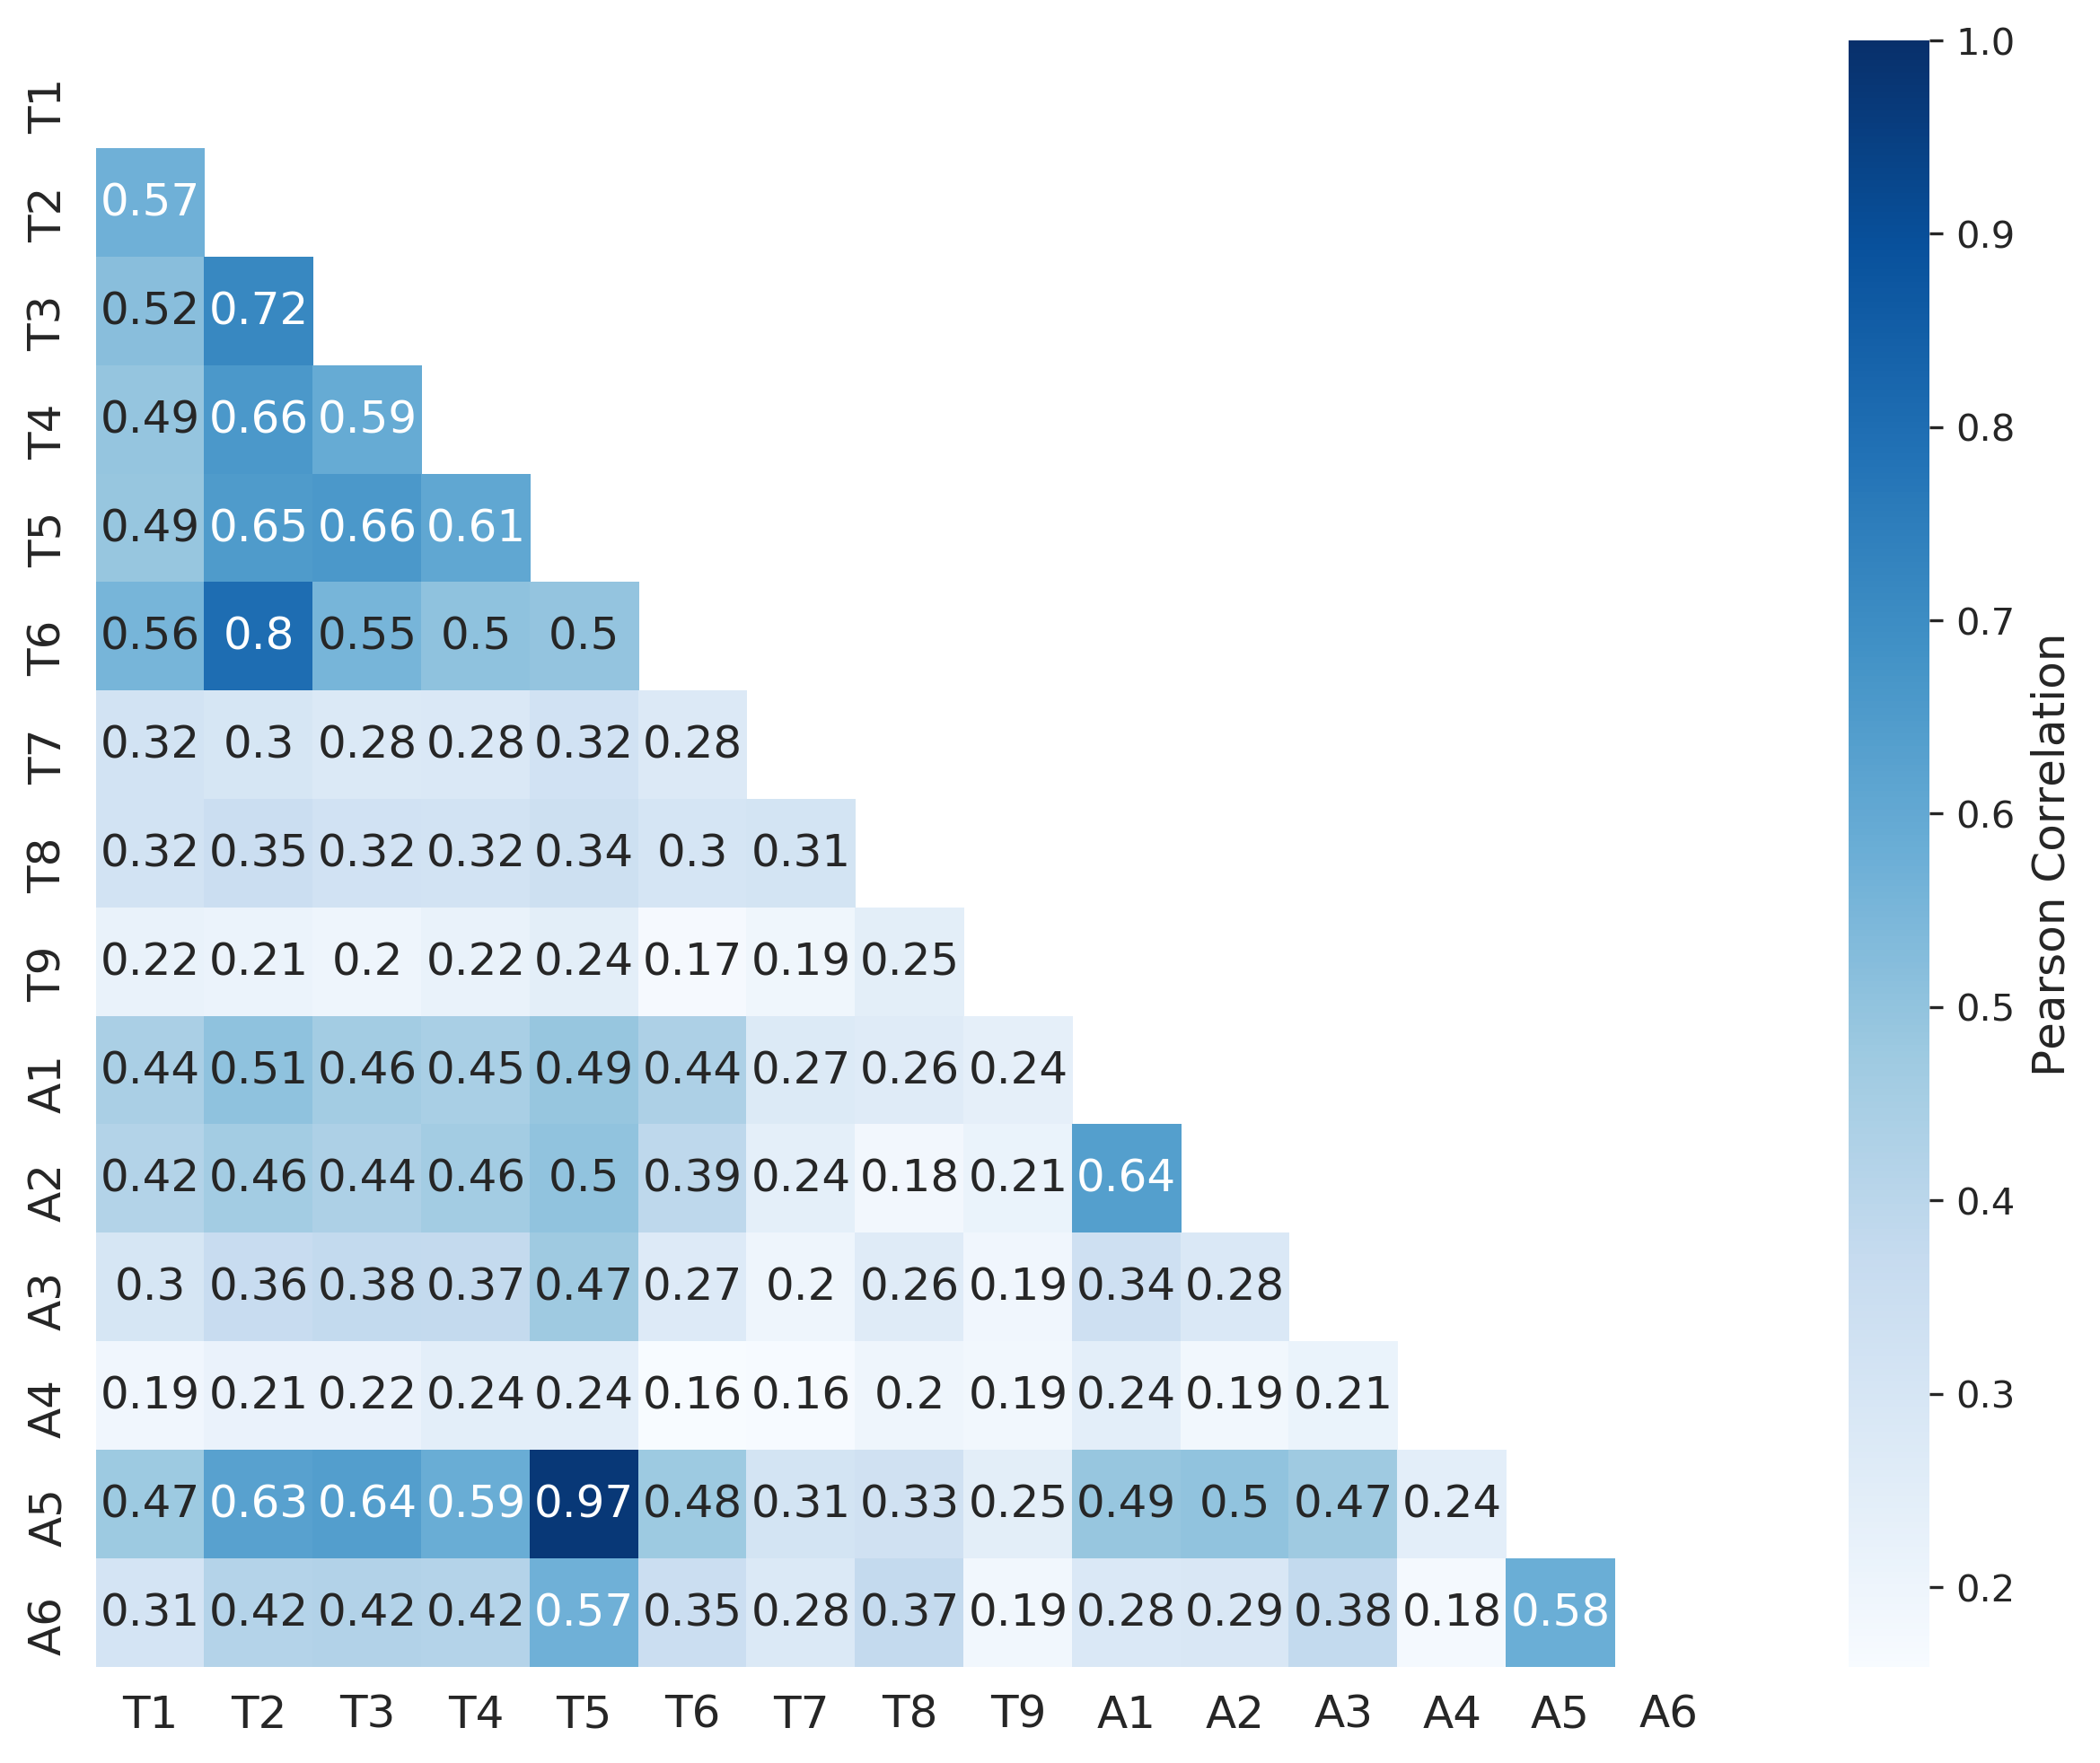

In [75]:
# Evaluate and plot correlation
corr_pearson = x.corr(method='pearson')
plt.figure(figsize=(12, 8), dpi = 300)
mask = np.zeros_like(corr_pearson)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr_pearson, mask=mask, vmax=1, square=True, cmap="Blues", 
                     annot=True, cbar_kws={'label': 'Pearson Correlation'}, annot_kws={"size": 12})
ax.figure.axes[-1].yaxis.label.set_size(12)    
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig(figures_dir+'ToolsCorr_120221.png', bbox_inches='tight')


In [80]:
x = correlation(x, 0.79)

In [81]:
x.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'T9', 'A1', 'A2', 'A3', 'A4',
       'A6'],
      dtype='object')

In [86]:
ntools = len(x.columns)

In [89]:
5**13

8192

In [90]:
ntools = len(x.columns)
x_combns = pd.DataFrame(index=x.index)
for n in range(2,ntools+1):
    cc = np.array(list(combinations(x.columns, n)))
    for c in cc:
        # combination 1
        x_combns['comb1_%d-%s'%(n,''.join(c))] = x[c].sum(axis=1)
        # combination 2
        s = 0
        for p, tool in enumerate(c):
            s=s+2**p*x[tool]
        x_combns['comb2_%d-%s'%(n,''.join(c))] = s

combns = x_combns.columns.tolist()

In [92]:
len(combns)

16356